# Описание проекта <a class="anchor" id="Описание"></a>

### *Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.*
### *Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными.*

### <p style="color:green;">*Интересная задача для аналитики, приступим к изучению данных!* </p>

### [Шаг 1. Файл с данными и изучение общей информации](#Шаг1)  

- [x] ***Путь к файлу: /datasets/games.csv***

### [Шаг 2. Подготовка данных](#Шаг2)

- [x] [Замените названия столбцов (приведите к нижнему регистру);](#Шаг2)
- [x] [Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;](#Типы)
- [x] Обработайте пропуски при необходимости;
- [x] [Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;](#Пропуски)
- [x] [Опишите причины, которые могли привести к пропускам;](#вывод2)
- [x] [Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;](#tbd)
- [x] [Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.](#суммапродаж)

### [Шаг 3. Исследовательский анализ данных](#Шаг3)
- [X] [Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?](#Платформы)
- [X] [Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?](#ТопПлатформы)
- [X] [Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы;](#АктПериод)
- [X] [Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ;](#ППП)
- [X] [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат;](#boxplot)
- [X] [Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы;](#отзывы)
- [X] [Соотнесите выводы с продажами игр на других платформах;](#другиеплатформы)
- [X] [Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#жанры)

### [Шаг 4. Составим портрет пользователя каждого региона](#Шаг4)

 **Определите для пользователя каждого региона (NA, EU, JP):**
- [X]  [Самые популярные платформы (топ-5). Опишите различия в долях продаж.](#доляппп)
- [X]  [Самые популярные жанры (топ-5). Поясните разницу.](#топжанры)
- [X]  [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#ESRB)

### [Шаг 5. Проверим гипотезы](#Шаг5)
- [X]  [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#meanratingplatforms)
- [X]  [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;](#meanratinggenres)
- [X]  [Задайте самостоятельно пороговое значение alpha;](#alpha)
- [X]  [Поясните:](#explain)

Как вы сформулировали нулевую и альтернативную гипотезы?

Какой критерий применили для проверки гипотез и почему?

### [Шаг 6. Общий вывод:](#Шаг6)

##### Описание данных:

*Name — название игры*

*Platform — платформа*

*Year_of_Release — год выпуска*

*Genre — жанр игры*

*NA_sales — продажи в Северной Америке (миллионы проданных копий)*

*EU_sales — продажи в Европе (миллионы проданных копий)*

*JP_sales — продажи в Японии (миллионы проданных копий)*

*Other_sales — продажи в других странах (миллионы проданных копий)*

*Critic_Score — оценка критиков (максимум 100)*

*User_Score — оценка пользователей (максимум 10)*

*Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.*

# 1. Откроем файлы, импортируем библиотеки <a class="anchor" id="Шаг1"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
from scipy import stats as st

try:
    games = pd.read_csv('C:/Users/COVIDisLIE/Downloads/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [2]:
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
games.info()
print('\nЧисло дубликатов:', games.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Число дубликатов: 0


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,"1,989.000",Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.000",Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,"2,006.000",Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.000",Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,"1,984.000",Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.000","16,715.000","16,715.000","16,715.000","16,715.000","8,137.000"
mean,"2,006.485",0.263,0.145,0.078,0.047,68.968
std,5.877,0.814,0.503,0.309,0.187,13.938
min,"1,980.000",0.000,0.000,0.000,0.000,13.000
25%,"2,003.000",0.000,0.000,0.000,0.000,60.000
50%,"2,007.000",0.080,0.020,0.000,0.010,71.000
75%,"2,010.000",0.240,0.110,0.040,0.030,79.000
max,"2,016.000",41.360,28.960,10.220,10.570,98.000


[Наверх к описанию проекта](#Описание)

# 2. Подготовка данных <a class="anchor" id="Шаг2"></a> <a class="anchor" id="суммапродаж"></a>

In [6]:
# Замена регистров названий столбцов
games.columns = games.columns.str.lower()

In [7]:
# Считаем количество продаж во всех регионах и создаем отдельный столбец
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,"2,006.000",Sports,41.360,28.960,3.770,8.450,76.000,8,E,82.540
1,Super Mario Bros.,NES,"1,985.000",Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN,40.240
2,Mario Kart Wii,Wii,"2,008.000",Racing,15.680,12.760,3.790,3.290,82.000,8.3,E,35.520
3,Wii Sports Resort,Wii,"2,009.000",Sports,15.610,10.930,3.280,2.950,80.000,8,E,32.770
4,Pokemon Red/Pokemon Blue,GB,"1,996.000",Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN,31.380
5,Tetris,GB,"1,989.000",Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN,30.260
6,New Super Mario Bros.,DS,"2,006.000",Platform,11.280,9.140,6.500,2.880,89.000,8.5,E,29.800
7,Wii Play,Wii,"2,006.000",Misc,13.960,9.180,2.930,2.840,58.000,6.6,E,28.910
8,New Super Mario Bros. Wii,Wii,"2,009.000",Platform,14.440,6.940,4.700,2.240,87.000,8.4,E,28.320
9,Duck Hunt,NES,"1,984.000",Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN,28.310


## Обработка пропусков и замена типа данных <a class="anchor" id="Типы"></a>

In [8]:
# Уникальные значения оценок критиков
games['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

По полученным значениям, делаем вывод о том, что система оценивания предполагает выставление целочисленных значений от 0 до 100

In [9]:
# Уникальные значения оценок пользователей
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

*По полученным значениям, делаем вывод о том, что система оценивания предполагает выставление нецелочисленных значений от 0 до 10.*
<a class="anchor" id="tbd"></a>
Обратим внимание на встречающийся рейтинг **tbd** (to be determined). Это рейтинг, который будет определён позже, то есть на момент выгрузки данных его нет, данное значение равносильно незаполненным значениям nan. Отличие заключается в том, что для tbd нам известно, что пользователи выставляли рейтинг игре, просто он не был вычислен системой.

Нам необходимо заменить тип данных для столбцов:

**year_of_release:** с < float > на < int >, поскольку число года - это целочисленное значение, а не число с плавающей точкой.

**user_score:** с < object > на < float >, так как оценка пользователей варьируется от 0 до 10 в числовом формате с плавающей 
точкой.

*Однако, сначала нужно обработать все пропущенные значения.*

In [10]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

**Пропуски отмечены в следующих столбцах:**

*name (название игры);*

*year_of_release (год выпуска);*

*genre (жанр игры);*

*critic_score (оценка критиков);*

*user_score (оценка пользователей);*

*rating (рейтинг от организации ESRB);*

*Также необходимо учесть значения tbd в данных с оценками пользователей.*

Изучим пропуски каждого столбца подробнее и заполним их там, где это возможно.

In [11]:
games.loc[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,"1,993.000",NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN,2.390
14244,NaN,GEN,"1,993.000",NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN,0.030


In [12]:
print('\nПропущенных значений:', games['name'].isna().mean().round(5)*100, '%')


Пропущенных значений: 0.012 %


<a class="anchor" id="Пропуски"></a>
У нас имеются 2 игры, для которых нет названия. Обе игры вышли в 1993 году на платформе Sega Genesis. Одна из них была продана везде, кроме Японии, вторая - только в Японии. Возможно, это разные игры, но может быть, это одна и та же игра. 
Пропущенные значения составляют менее 1% от всех данных, поэтому мы можем их удалить. Так как целью анализа является определение конкретных названий игр, являющихся перспективными, то заменять на "Unknown" будет не информативно.

In [13]:
games.dropna(subset = ['name'], inplace = True)

In [14]:
print('\nПропущенных значений:', games['year_of_release'].isna().mean().round(3)*100, '%')


Пропущенных значений: 1.6 %


**Пропущенные значения составляют всего 1,6% от всех данных, поэтому можем их удалить, а затем поменять тип значений в столбце.**

In [15]:
games.drop(games.loc[(games['year_of_release'].isnull())].index, inplace=True)

In [16]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [17]:
print('\nПропущенных значений:', games['year_of_release'].isna().mean(),'%')


Пропущенных значений: 0.0 %


In [18]:
games['genre'].isna().mean()

0.0

In [19]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
total_sales           0
dtype: int64

**После проделанных шагов, пропущенных значений стало меньше, осталось обработать столбцы:**
***'critic_score', 'user_score', 'rating'***

In [20]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

**Ассоциация ESRB определяет возрастной рейтинг компьютерных игр. Имеется 8 вариантов рейтинга:**

AO ("Adults Only 18+") — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет;

E ("Everyone") — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше, такие игры могут понравиться и взрослым;

E10+ ("Everyone 10 and older") — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови;

EC ("Early childhood") — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими;

K-A ("Kids to Adult") — «От детей до взрослых»: Игры, содержание которых подходит любой аудитории;

M («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет;

T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше;

RP («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.

Есть игры, в которых значение рейтинга ESRB пропущено

[Наверх к описанию проекта](#Описание)

### Оценка критиков и оценка пользователей
Прежде чем мы оценим пропуски по оценкам, необходимо обработать значения **tbd** для оценок пользователей. Выш мы указывали на то, что по своей сути этот показатель равносилен пропущенным значениям, так как это рейтинг, которого нет на момент выгрузки данных. Соответственно, мы можем заменить его на пропущенное значение.

In [21]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')

In [22]:
games['critic_score'] = games['critic_score'].astype('float')

**Проанализируем пропуски в столбцах с оценками игр:**

In [23]:
games['critic_score'].isna().mean().round(5)*100

51.453

In [24]:
games['user_score'].isna().mean().round(5)*100

54.616

Получилось 51% пропущенных значений оценок критиков и около 55% - оценок пользователей. Это довольно много. Удалисть строки нельзя, так как потеряем большой объём данных, но и восстановить данные мы не можем, ведь оценка может иметь множество параметров при оценивании игр. 

**Попытаемся понять причины такого большого количества пропусков. Рассмотрим количество пропусков по годам.**

In [25]:
critscore_nan_year = (games
                          .loc[games['critic_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )
userscore_nan_year = (games
                          .loc[games['user_score'].isna()==True]
                          .pivot_table(index='year_of_release', values='name', aggfunc='count')
                          .reset_index()
                     )

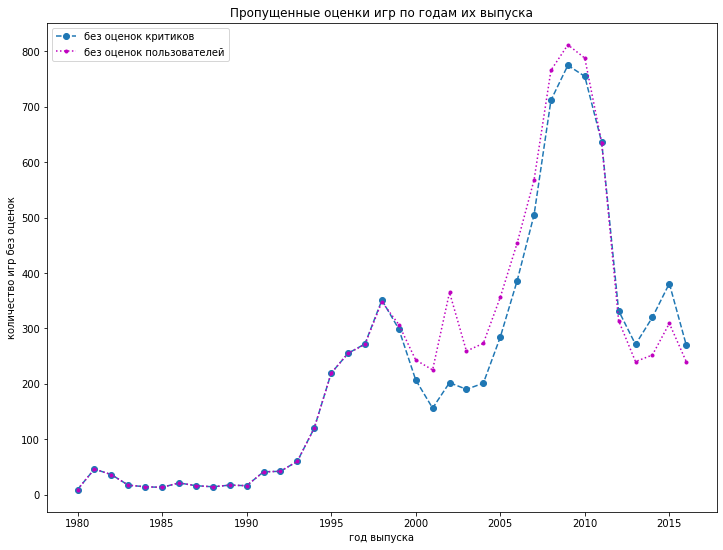

In [26]:
fig, ax = plt.subplots(figsize=(12,9))
ax.set(title='Пропущенные оценки игр по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без оценок')
ax.plot(critscore_nan_year['year_of_release'], critscore_nan_year['name'], '--o', label='без оценок критиков')
ax.plot(userscore_nan_year['year_of_release'], userscore_nan_year['name'], '.:m', label='без оценок пользователей')
ax.grid=True
ax.legend(frameon=True)
plt.show()

In [27]:
# Количество игр, у которых отсутствует оценка критиков, но есть оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()!=True)])

569

In [28]:
# Количество игр, у которых отсутствует оценка пользователей, но есть оценка критиков
len(games.loc[(games['user_score'].isna()==True) & (games['critic_score'].isna()!=True)])

1089

In [29]:
# Количество игр, у которых отсутствует и оценка критиков, и оценка пользователей
len(games.loc[(games['critic_score'].isna()==True) & (games['user_score'].isna()==True)])

7892

### Рейтинг от организации ESRB

In [30]:
games['rating'].isna().mean().round(5)*100

40.598

In [31]:
rating_nan_year = (games
                        .loc[games['rating'].isna()==True]
                        .pivot_table(index='year_of_release', values='name', aggfunc='count')
                        .reset_index()
                     )

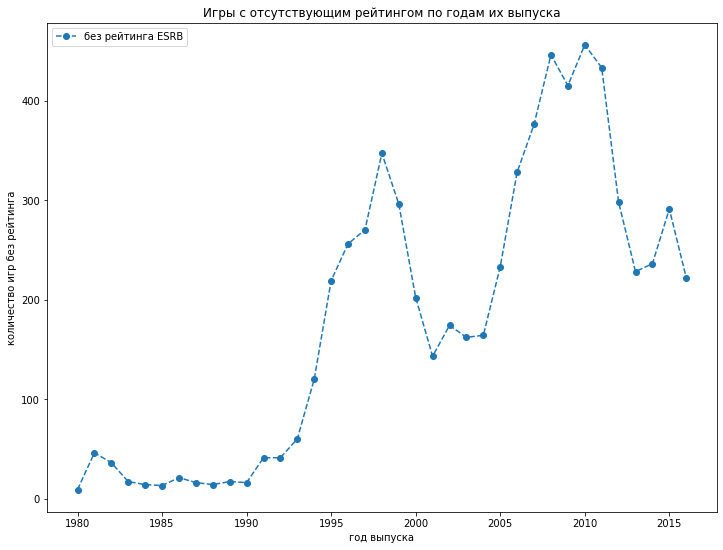

In [32]:
fig, ax = plt.subplots(figsize=(12,9))
ax.set(title='Игры с отсутствующим рейтингом по годам их выпуска',
       xlabel='год выпуска', ylabel='количество игр без рейтинга')
ax.plot(rating_nan_year['year_of_release'], rating_nan_year['name'], '--o', label='без рейтинга ESRB')
ax.grid=True
ax.legend(frameon=True)
plt.show()

***Наблюдаем ту же динамику количества игр без рейтинга, что и без оценок. Возможно, причины пропусков в данных могут быть теми же.***

***Проверим, что заполнены все пропуски, которые могут быть заполнены:***

In [33]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

**Заменим оставшиеся пропуски значением "-1", так как неизвестны причины отсутствия рейтинга и чтобы не спутать с реальной нулевой оценкой игры**

In [34]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

**Заменим пропуски в рейтинге ESRB**

In [35]:
games['rating'] = games['rating'].fillna('unknown')

In [36]:
# Установим наличие дубликатов в данных
games.duplicated().sum()

0

### Теперь в данных отсутствуют дубликаты и пропуски в значениях

## Промежуточный вывод: <a class="anchor" id="вывод2"></a>

*Во время обработки пропусков была обнаружена интересная тенденция: количество игр, для которых нет оценки критиков по годам выпуска практически соответствовало количеству игр, для которых нет оценки пользователей, и количеству игр, для которых нет рейтинга от организации ESRB. 
Характерная динамика показателей может быть связана с тем, что игр стало выходить больше и игроки распределились между играми, не имея возможности оценить все из них. Появилось много новых игровых платформ, что также привело к распределению по платформам среди пользователей.*

*Также часть пропусков за последние годы скорее всего связана с показателем **tbd (to be determined)**: игра была оценена, но система не посчитала рейтинг на момент выгрузки данных (рейтинг по оценке пользователей будет представлен позже). Что касается пропусков в оценках критиков и рейтинге ESRB, возможно, часть игр также не была сведена в оценку и рейтинг на момент выгрузки (оценка и рейтинг появятся немного позже). Кроме того, критики и ESRB, вероятно, оценивают и выставляют рейтинг не каждой вышедшей игру, а наиболее ожидаемые и пользующиеся спросом игры, либо игре в целом - только на одной из платформ. Также возможно, что данные по оценкам и рейтингу отсутствуют в открытом доступе.*


[Наверх к описанию проекта](#Описание)

# 3. Исследовательский анализ данных <a class="anchor" id="Шаг3"></a>

### Количество вышедших игр по годам

In [37]:
games_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()

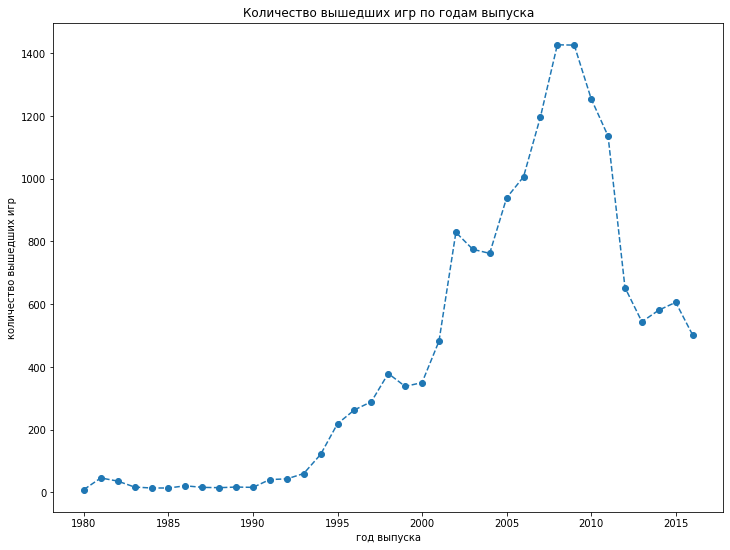

In [38]:
fig, ax = plt.subplots(figsize=(12,9))
ax.set(title='Количество вышедших игр по годам выпуска',
       xlabel='год выпуска', ylabel='количество вышедших игр')
ax.plot(games_year['year_of_release'], games_year['name'], '--o')
ax.grid=True
plt.show()

**Заметим, что в данных очень мало игр, выпущенных с 1980 по 1990 годы. С 1990 по 2000 гг. представлено больше игр, но основной объём информации приходится на игры, вышедшие с 2000 по 2016 гг.**

**Таким образом, у нас имеется "хвост данных", который следует отбросить - это период до 1995 года: данные за этот период незначительные и непоказательные.**

### Продажи по платформам <a class="anchor" id="Платформы"></a>

Составим Топ-лист платформ по продажам:

In [39]:
platform_popular = (games
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(11)
                        .reset_index(drop=True)
                   )
platform_popular

,platform,total_sales
0,PS2,"1,233.560"
1,X360,961.240
2,PS3,931.340
3,Wii,891.180
4,DS,802.780
5,PS,727.580
6,PS4,314.140
7,GBA,312.880
8,PSP,289.530
9,3DS,257.810


**Построим график для явного топа платформ**

[Text(0.5, 0, 'Платформа'), Text(0, 0.5, 'Продажи')]

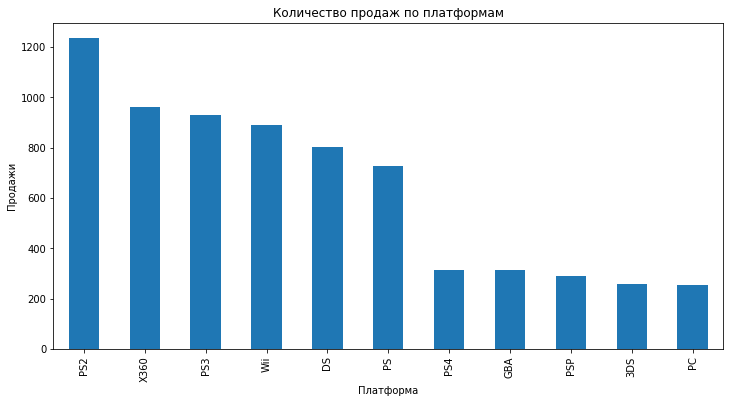

In [40]:
platform_popular.plot(kind='bar',
                      y='total_sales',
                      x='platform',
                      legend=False, title='Количество продаж по платформам',
                      figsize=(12, 6)).set(xlabel='Платформа',ylabel='Продажи')

In [41]:
# Создадим список с названием платформ из Топ-листа
platforms = platform_popular['platform']

### Построим и изучим распределение суммарных продаж по годам для каждой из TOP10 платформ. 
<a class="anchor" id="ТопПлатформы"></a>

In [42]:
platform_year = (games
                      .loc[games['platform'].isin(platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )

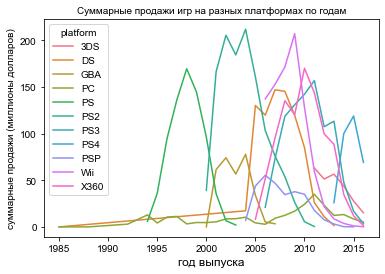

In [43]:
plot = sns.lineplot(data=platform_year, x="year_of_release", y="total_sales", hue="platform")
plt.title("Суммарные продажи игр на разных платформах по годам", fontsize=10)
plt.xlabel('год выпуска', fontsize=12)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=10)
sns.set(rc={"figure.figsize":(15, 10)})
plt.show()

Видим тенденцию, где игры на Playstation набирали популярность с 1994 года, достигли пика по продажам к 1998 году и исчезли в 2002-2003 годах. В 2000 году появились игры на Playstation2, которые достаточно долго (с 2001 по 2005 гг.) лидировали на рынке игр по продажам. На их смену пришли игры на карманных консолях DS, которые с 2004 года набрали моментальную популярность в 2005-2010 гг. Практически в то же время (с 2006 по 2010 гг. с пиком в 2009 г.) были популярны игры на платформе Wii. В те же годы на смену Playstation2 пришли игры на платформе Playstation3, которые продавались максимально хорошо в 2008-2013 гг. Вместе с Playstation3 в те же годы были популярны игры на Xbox360.

Из всех этих платформ самой продаваемой по сумме продаж являлась Playstation2. На тот момент у неё не было конкурентоспособных аналогов, она в течение долгого времени занимала топовые позиции. Второе и третье места делят между собой Xbox360, Playstation3, DS и Wii: игры на этих платформах были популярны в одни и те же годы, и предпочтения потребителей игр разделились между ними. Отдельно отметим Playstation - игры на этой платформе выходили в ранние годы, и на тот момент не наблюдалось конкурентоспособных аналогов.

Примерный срок, за который устаревает платформа, составляет около 8-10 лет. Со временем, еще стало появляться больше конкурентоспособных платформ, способных занять нишу и привлечь свою категорию потребителей.

Исходя из анализа количества выпущенных игр по годам и анализа продаж по платформам, продажа игр на которых приносит наибольший доход, можем сделать вывод о том, что период до 1994 года не является актуальным для анализа. До 1994 года выходило слишком мало игр, относительно общей выборки, а также не наблюдалось лидирующих по суммарным продажам платформ. Более того, только за последние 10 лет мы наблюдаем и большое количество игр, и большой выбор платформ, которые могут составить друг-другу конкуренцию. 

**Для дальнейшего анализа выберем данные за последние несколько лет с 2013 года, так как они отражают актуальную ситуацию.**

[Наверх к описанию проекта](#Описание)

In [44]:
games_actual = games.query('year_of_release >= 2013 & year_of_release <= 2016')

In [45]:
games['year_of_release'].max()

2016

**Возьмем актуальный период c 2013 по 2016 год, так как он отражает последние тенденции ярче всего и на его основе можно делать дальнейшие предположения**

### Продажи по платформам в актуальный период <a class="anchor" id="АктПериод"></a>

Составим сводную таблицу, которая покажет динамику лидерства платформ по продажам

In [46]:
platform_din = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_din

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.570,43.760,27.780,15.140
DS,1.540,NaN,NaN,NaN
PC,12.380,13.280,8.520,5.250
PS3,113.250,47.760,16.820,3.600
PS4,25.990,100.000,118.900,69.250
PSP,3.140,0.240,0.120,NaN
PSV,10.590,11.900,6.250,4.250
Wii,8.590,3.750,1.140,0.180
WiiU,21.650,22.030,16.350,4.600


In [47]:
platform_din.dropna(subset = [2016], inplace = True)
platform_din

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.570,43.760,27.780,15.140
PC,12.380,13.280,8.520,5.250
PS3,113.250,47.760,16.820,3.600
PS4,25.990,100.000,118.900,69.250
PSV,10.590,11.900,6.250,4.250
Wii,8.590,3.750,1.140,0.180
WiiU,21.650,22.030,16.350,4.600
X360,88.580,34.740,11.960,1.520
XOne,18.960,54.070,60.140,26.150


Получили срез из платформ, которые будут актуальны в 2017 году. Удалим пустые столбцы и построим график для этих платформ

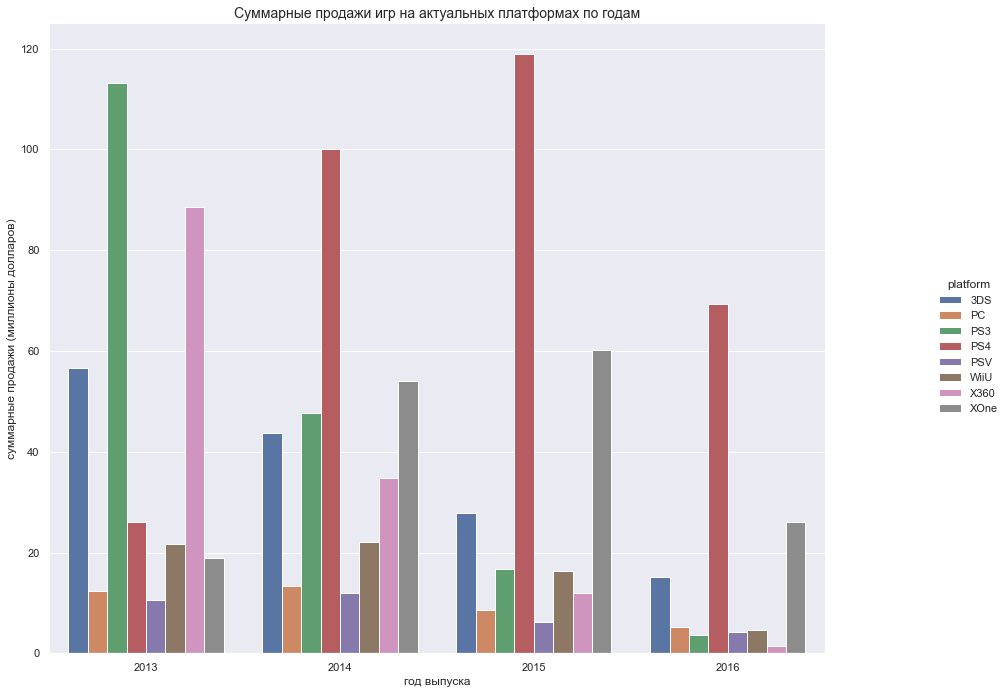

In [48]:
platform_din = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne", "PC", "X360", "PS3"))==True) & (
                                  games_actual['year_of_release'].isin((2013, 2014, 2015, 2016))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue="platform", kind="bar", data=platform_din)
plt.title("Суммарные продажи игр на актуальных платформах по годам", fontsize=14)
plt.xlabel('год выпуска', fontsize=12)
plt.ylabel('суммарные продажи (миллионы долларов)', fontsize=12)
plot.fig.set_size_inches(15,10)

<a class="anchor" id="ППП"></a>
**Получили потенциально прибыльные в 2017 году платформы:** 

3DS, которая уже несколько лет пользуется популярностью у потребителей игр; 

Playstation4, только набирающая обороты и приносящая самый высокий доход от продаж; 

PlaystationVita, не настолько популярная (что может быть связано с меньшим количеством игр на данной платформе), но еще способная принести прибыль в ближайшие 2-3 года; 

WiiU, следующая поколение приставки  Wii, которая была достаточно популярна в своё время; 

XBoxOne от компании Microsoft, способная составить конкуренцию Playstation4.

**При этом наблюдается рост популярности у потребителей игр для Playstation4 и XBoxOne; и снижение спроса на игры на платформах 3DS, PlaystationVita и WiiU, тем не менее, даже они потенциально могут принести достаточно высокий доход до появления аналогов нового поколения.**

[Наверх к описанию проекта](#Описание)

### Наиболее перспективные платформы

Мы выделили наиболее перспективные платформы, которые будем далее анализировать. Оставим в срезе данных только игры, относящиеся к данным платформам.

In [49]:
profit_platforms = pd.Series(platform_din['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profit_platforms)==True].reset_index(drop=True)
games_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.020,9.090,0.980,3.960,97.000,8.200,M,21.050
1,Grand Theft Auto V,X360,2013,Action,9.660,5.140,0.060,1.410,97.000,8.100,M,16.270
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,-1.000,-1.000,unknown,14.630
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.280,4.190,4.350,0.780,-1.000,-1.000,unknown,14.600
4,Grand Theft Auto V,PS4,2014,Action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620


In [50]:
# Создадим таблицу, необходимую для построения ящика с усами, исключив ненужные столбцы
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()

### Построим графики "ящиков с усами" по глобальным продажам каждой игры и разбивкой по платформам <a class="anchor" id="boxplot"></a>

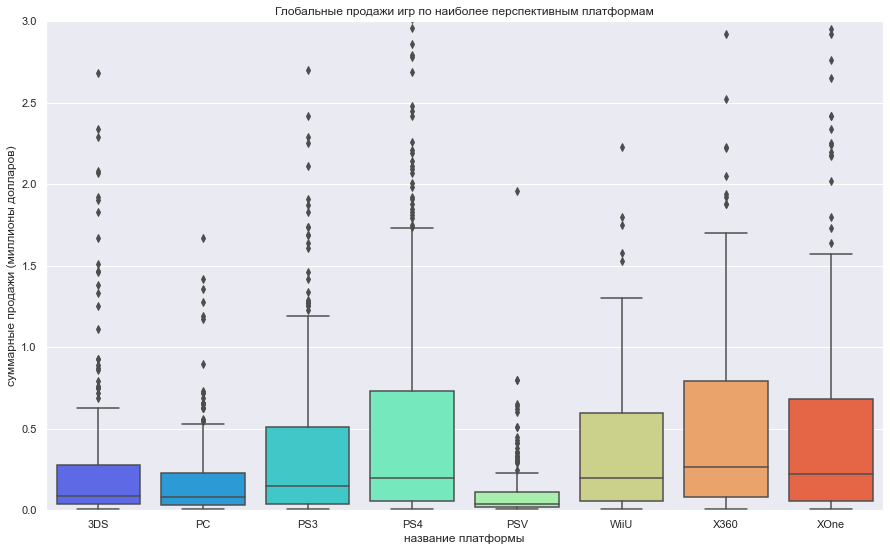

In [51]:
fig = plt.subplots(figsize=(15,9))
plt.title("Глобальные продажи игр по наиболее перспективным платформам")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow')
plt.ylim(0, 3)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

На каждой из платформ существует большое количество игр, суммарные продажи по которым выбиваются из квартильных значений. В целом, разница в суммарных продажах игр в рамках каждой из платформ очень велико для 3DS и PS4, чуть меньше - для WiiU и XBoxOne и относительно небольшая - для PSVita.

Сравним показатели по наиболее часто встречающимся значениям: для этого нам интересны среднее, медианное и квартильные значения. **Исключим из визуализации выбивающиеся значения и построим график**

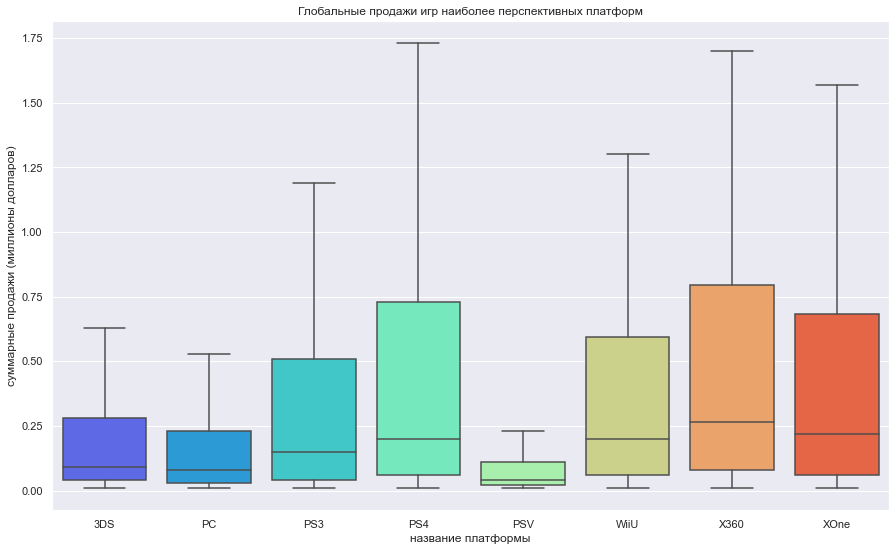

In [52]:
fig = plt.subplots(figsize=(15,9))
plt.title("Глобальные продажи игр наиболее перспективных платформ")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

На всех платформах наблюдается превышение среднего значения над медианным и скос датасетов вправо: для PS4, X360 и XBoxOne наиболее сильно, затем WiiU и PS3, чуть меньше для 3DS, PC и относительно небольшой для PSVita. Также видим различия в медианных значениях: игры на PS4, X360 и XBoxOne имеют схожие графики (квартильные, средние и медианные значения), а WiiU и PS3 характеризуются меньшим значением; затем идёт 3DS, PC и PSVita.

Возможно, это из-за разнобразия игр на ведущих платформах: Playstation и XBox достаточно давно приобрели популярность среди потребителей, они могут позволить себе выпускать больше игрового контента в разной ценовой категории, способного найти "своего" покупателя, поэтому их графики шире и растянутее. Wii тоже достаточно "старая" и известная консоль, но менее популярная - соответственно разнообразие игр на данной платформе может быть ниже. Что касается PSVita - это консоль с небольшим разнообразием игр, которые, как мы видим по графику, схожи в ценовой категории и по продажам - разброс по данной платформе самый небольшой, и среднее значение не сильно превосходит медианное

[Наверх к описанию проекта](#Описание)

### Влияние отзывов на продажи <a class="anchor" id="отзывы"></a>

Чтобы изучить влияние отзывов пользователей и критиков на продажи, возьмём самые популярные платформы (исходя из суммарных продаж за последние годы), которые мы выделили ранее

**Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**

In [53]:
games_popular = games_actual.query('critic_score != -1 and user_score != -1')

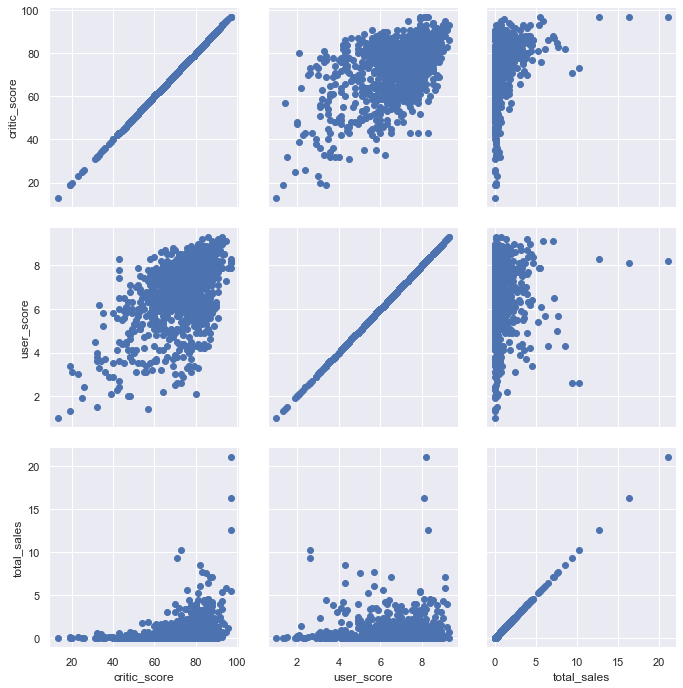

In [54]:
Scaterplots = sns.PairGrid(games_popular[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
Scaterplots.fig.set_size_inches(10,10)
plt.show()

In [55]:
Correlation = games_popular.corr()
Correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000,-0.151,-0.092,-0.112,-0.106,0.063,0.049,-0.136
na_sales,-0.151,1.000,0.723,0.249,0.795,0.299,-0.020,0.911
eu_sales,-0.092,0.723,1.000,0.278,0.931,0.279,-0.031,0.933
jp_sales,-0.112,0.249,0.278,1.000,0.272,0.132,0.194,0.380
other_sales,-0.106,0.795,0.931,0.272,1.000,0.274,-0.011,0.944
critic_score,0.063,0.299,0.279,0.132,0.274,1.000,0.502,0.312
user_score,0.049,-0.020,-0.031,0.194,-0.011,0.502,1.000,-0.004
total_sales,-0.136,0.911,0.933,0.380,0.944,0.312,-0.004,1.000


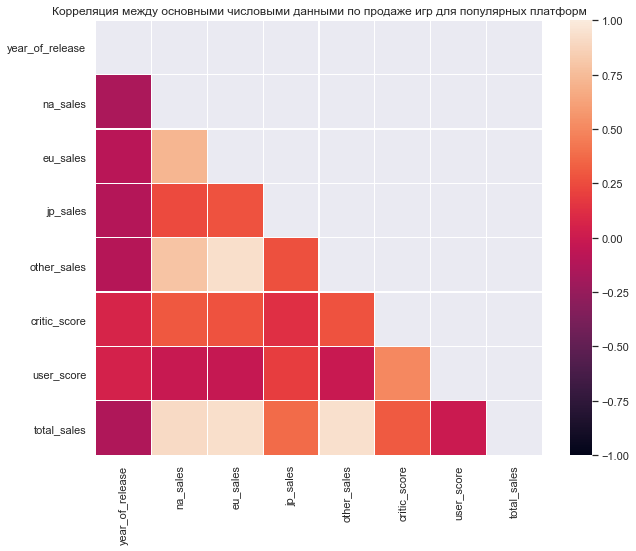

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("Корреляция между основными числовыми данными по продаже игр для популярных платформ")
mask = np.triu(np.ones_like(Correlation, dtype=np.bool_))
sns.heatmap(Correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

Коэффициент корреляции между оценками критиков и совокупными продажами составил 0,25 (по региональным продажам этот коэффициент примерно схож и близок к 0,25-0,29; кроме Японии - 0,1), что говорит о небольшой зависимости между этими показателями. Этот же вывод мы можем сделать из диаграммы рассеяния: игры с низкими оценками критиков практически не продаются, в то время как игры с высокими оценками имеют больше продаж. С одной стороны, это может быть связано с тем, что люди обращают внимание на оценку игры, прежде чем покупают её (но корреляция невысокая, соответственно, это не ключевой показатель). С другой стороны, возможно, критиками оцениваются не все игры, а наиболее популярные у покупателей (или потенциально популярные - по "рейтингу ожидания").

Коэффициент корреляции между оценкой покупателей и совокупными продажами составил 0,18, что говорит об отсутствии зависимости между этими показателями. При этом, диаграмма рассеяния схожа с диаграммой рассеяния по оценкам критиков, но имеет больший разброс при низких оценках. Возможно, это связано с тем, что потребитель сначала покупает игру, а затем, поиграв, ставит ей оценку, исходя из субъективного впечатления. Таким образом, одна и та же игра может оставить как хорошее, так и плохое впечатление. Тут уже все зависит от индивидуальных предпочтений. 

**Связь оценок с суммами продаж не является сильной, соответственно, на продажи игр влияют какие-то иные факторы.**

[Наверх к описанию проекта](#Описание)

**Выберем одну платформу - PlayStation 4**

**Посчитаем корреляцию и построим графики**

In [57]:
games_actual_rating = games_actual.query('critic_score != -1 and user_score != -1')

ps4 = games_actual_rating[games_actual_rating['platform'] == 'PS4']
columns = ['user_score', 'critic_score', 'total_sales']

In [58]:
ps4[columns].corr()

,user_score,critic_score,total_sales
user_score,1.000,0.558,-0.034
critic_score,0.558,1.000,0.406
total_sales,-0.034,0.406,1.000


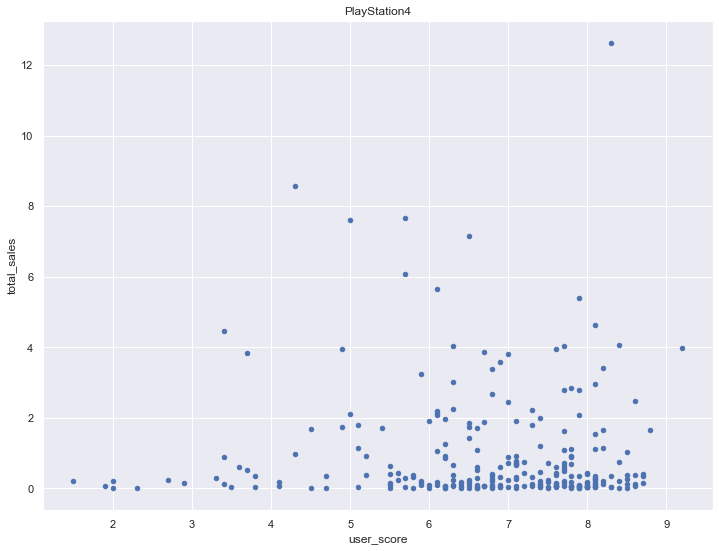

In [59]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PlayStation4', figsize=(12,9));

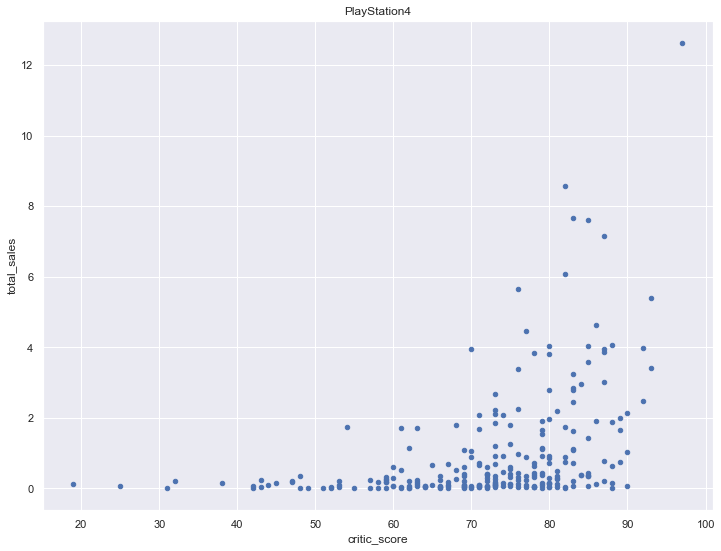

In [60]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PlayStation4', figsize=(12,9));

<div class="alert alert-info"> 

<b> Вывод: </b>    

* Нет взаимосвязи между оценками игроков и продажами
    
* Есть взаимосвязь между оценками критиков и игроков
    
* Также присутствует связь между оценками критиков и продажами
    
* Но высокая оценка критиков не гарантирует высокие продажи

</div>

### Другие платформы <a class="anchor" id="другиеплатформы"></a>

**Выберем несколько платформ и сравним результаты**

In [61]:
relevant_platforms = ["3DS", "PSV", "WiiU", "XOne", "PC", "X360", "PS3"]

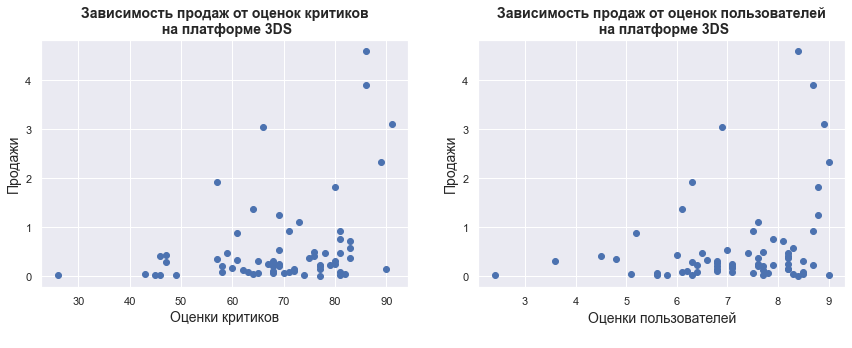

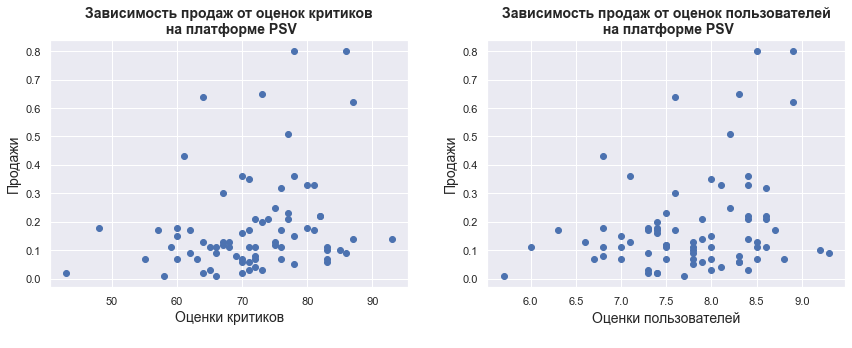

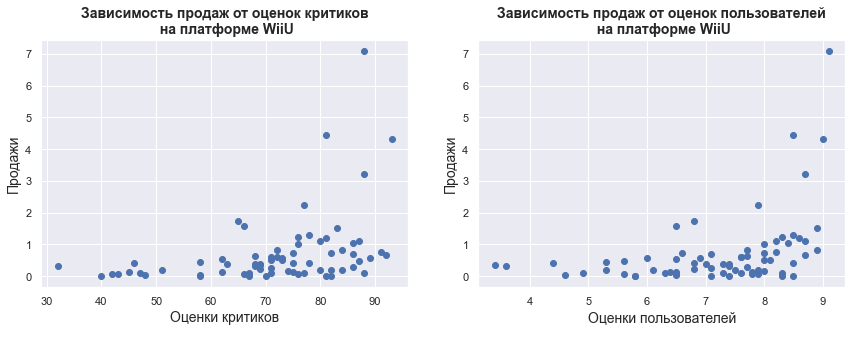

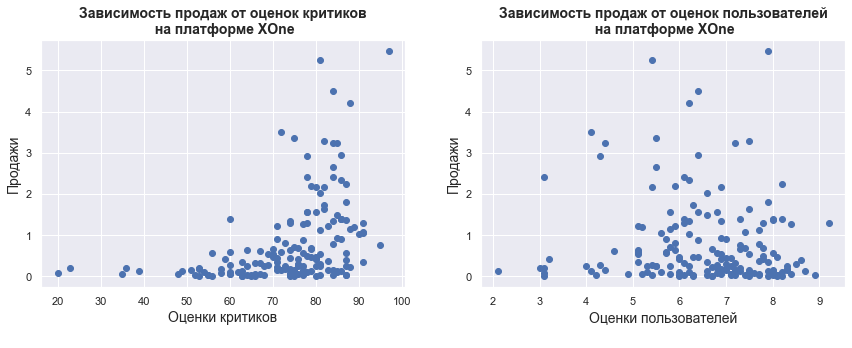

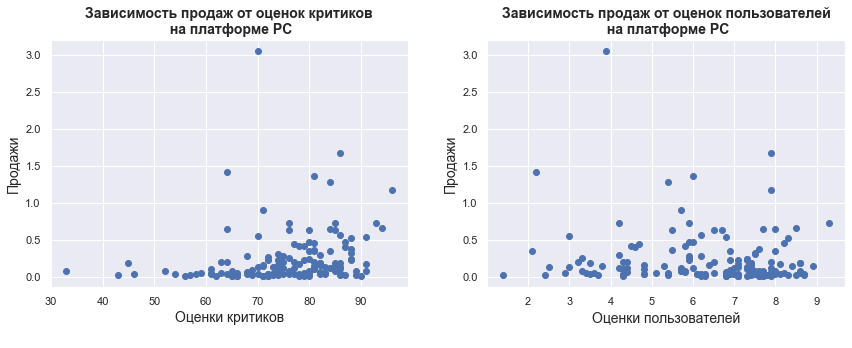

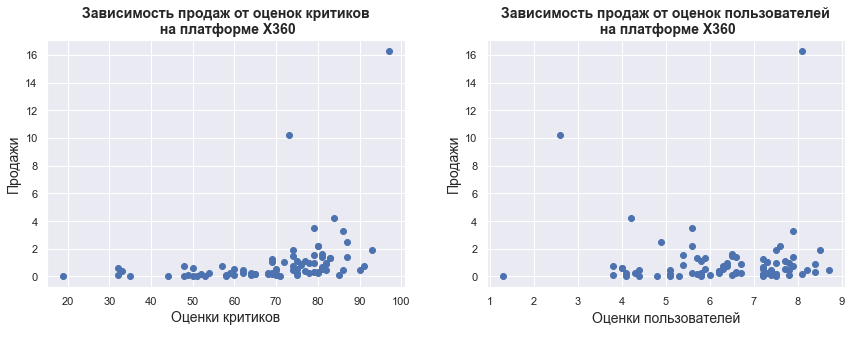

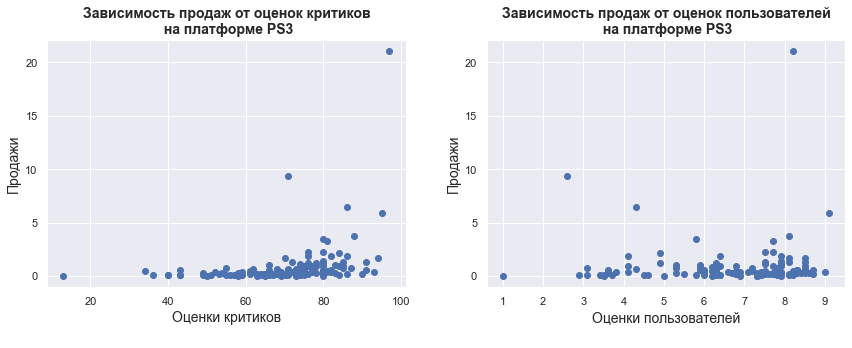

In [62]:
# используем цикл для построения диаграмм рассеяния
# диаграммы зависимости продаж от оценок критиков и пользователей расположим рядом слева и справа соответственно

for name_platform in relevant_platforms:
    x_critic = games_actual_rating[games_actual_rating['platform']==name_platform]['critic_score']
    y_critic = games_actual_rating[games_actual_rating['platform']==name_platform]['total_sales']
    
    x_user = games_actual_rating[games_actual_rating['platform']==name_platform]['user_score']
    y_user = games_actual_rating[games_actual_rating['platform']==name_platform]['total_sales']
    
    
    fig = plt.figure(figsize=(12, 5))
    
    ax1 = fig.add_subplot(121)
    ax1.scatter(x_critic, y_critic)
    ax1.set_title('Зависимость продаж от оценок критиков\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax1.set_xlabel('Оценки критиков\n', fontsize=14)
    ax1.set_ylabel('Продажи', fontsize=14)
    
    ax2 = fig.add_subplot(122)
    ax2.scatter(x_user, y_user)
    ax2.set_title('Зависимость продаж от оценок пользователей\n на платформе '+name_platform, fontsize=14, fontweight="bold")
    ax2.set_xlabel('Оценки пользователей\n', fontsize=14)
    ax2.set_ylabel('Продажи', fontsize=14)
    
    plt.tight_layout(w_pad=3)

<div class="alert alert-info"> Посчитаем коэффициент корреляции </div>

In [63]:
print('Коэффициент корреляции')
print()
print('{: <30}|{: <30}'.format('продажи и оценки критиков', 'продажи и оценки пользователей'))
print('_____________________________________________________________')
print()
for name_platform in relevant_platforms:
    print(name_platform)
    print()
    print('{: <30.2}{: <30.2}'.format(games_actual_rating[games_actual_rating['platform']==name_platform]['total_sales']\
                                   .corr(games_actual_rating[games_actual_rating['platform']==name_platform]['critic_score'])\
                                   
                                   , games_actual_rating[games_actual_rating['platform']==name_platform]['total_sales']\
                                   .corr(games_actual_rating[games_actual_rating['platform']==name_platform]['user_score'])))
    print('_____________________________________________________________')
    print()

Коэффициент корреляции

продажи и оценки критиков     |продажи и оценки пользователей
_____________________________________________________________

3DS

0.34                          0.27                          
_____________________________________________________________

PSV

0.25                          0.27                          
_____________________________________________________________

WiiU

0.38                          0.41                          
_____________________________________________________________

XOne

0.41                          -0.094                        
_____________________________________________________________

PC

0.19                          -0.11                         
_____________________________________________________________

X360

0.35                          -0.0062                       
_____________________________________________________________

PS3

0.33                          0.023                         
_________

<div class="alert alert-info">
    
Исходя из графиков расеяния можно сказать, что объем продаж довольно резко возрастает при оценке критиков от 60 и выше, до этой отметки продажи малы.
Зависимость продаж от оценок пользователей менее выраженная, но можно сказать, что продажи растут начиная с отметки 4 балла

В целом коэффициент корреляции показывает, что зависимость продаж от оценок критиков сильнее, чем от оценок пользователей, кроме WiiU и PSV, где коэффициент корреляции примерно одинаков
    
<b> 
В целом, результаты очень похожи, как и в выбранной отдельно PS4, оценки критиков оказывают чуть большее влияние на продажи, чем оценки пользователей.
</b>
    </div>

[Наверх к описанию проекта](#Описание)

### Распределение игр по жанрам <a class="anchor" id="жанры"></a>

Построим график по глобальным продажам каждой игры и разбивкой по жанрам

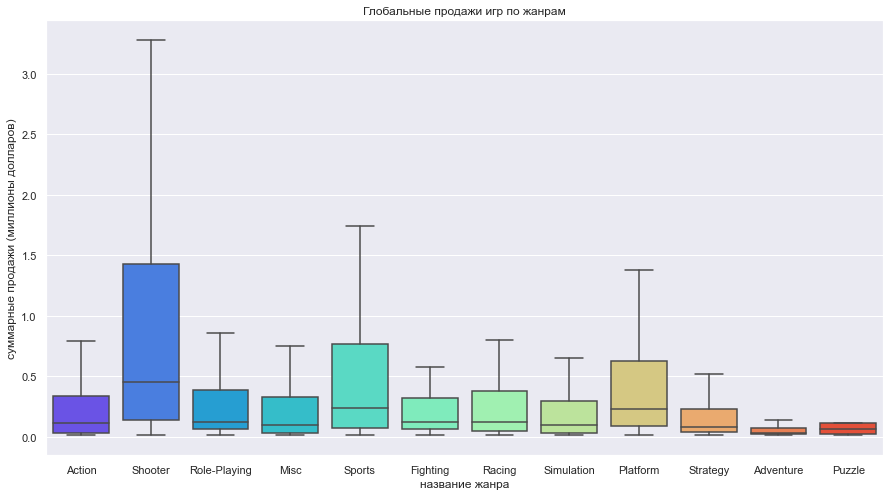

In [64]:
fig = plt.subplots(figsize=(15,8))
plt.title("Глобальные продажи игр по жанрам")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('название жанра')
plt.ylabel('суммарные продажи (миллионы долларов)')
plt.show()

**Распределение игр по жанрам**

<AxesSubplot:ylabel='genre'>

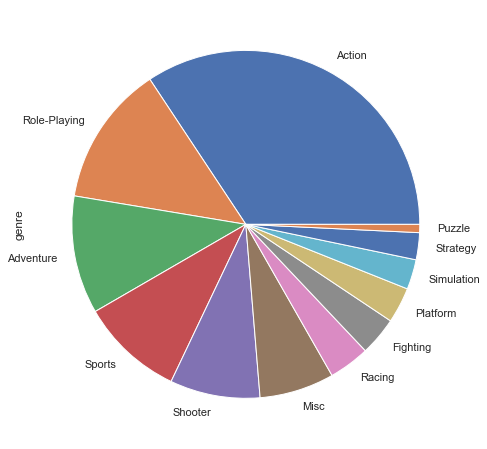

In [65]:
games_actual['genre'].value_counts().plot(kind='pie', figsize=(8, 8), legend=False, )

**Выведем таблицу наиболее прибыльных жанров и жанров с низкими продажами**

In [66]:
(games_actual
             .pivot_table(index='genre', values='total_sales', aggfunc='mean')
             .sort_values(by='total_sales', ascending=False)
             .reset_index()
)

,genre,total_sales
0,Shooter,1.246
1,Sports,0.704
2,Platform,0.576
3,Role-Playing,0.500
4,Racing,0.469
5,Fighting,0.441
6,Action,0.420
7,Misc,0.405
8,Simulation,0.351
9,Puzzle,0.186


**Для информации, посмотрим сколько игр по жанрам**

In [67]:
most_popular_genre = games.groupby('genre').agg({'name':'count'}).reset_index()
most_popular_genre.sort_values(by='name', ascending=False).head(10)

,genre,name
0,Action,3307
10,Sports,2306
3,Misc,1721
7,Role-Playing,1481
8,Shooter,1296
1,Adventure,1293
6,Racing,1226
4,Platform,878
9,Simulation,857
2,Fighting,837


* **Самым прибыльным** жанром является "Экшн", при этом основные покупатели потратили не настолько большую сумму на покупку игр в данном жанре. То есть прибыльность жанра связана с продажей нескольких, выбивающихся, дорогих игр. На втором месте по доходу за анализируемый актуальный период находится жанр "Спорт", но для спортивных игр характерна та же ситуация, что и для игр в жанре "Экшн": сверхдоходность, скорее всего, связана с продажей каких-то очень дорогих игр,но не является правилом для всего жанра.

* Иная ситуация с третьей по доходности позицией: жанром "Шутер". Это **самое доходное**, в среднем, направление игр, пользующееся высоким спросом. Средний и медианный уровни продаж этого жанра выше значений по любому другому жанру; а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи.

* Стратегии принесли **самый низкий доход**, но это не значит, что покупатели приобретают в этом жанре самые дешевые игры, в сравнении с другими жанрами. Мы наблюдаем подобную ситуацию как для "Экшна" и "Спорта", но действующую зеркально. Жанр "Квест" имеет схожую со "Стратегией" характеристику по продаваемости: они слабо продаются и принесли минимальный доход, но это не самые неперспективные жанры.

* Самым **неперспективным** жанром игр для продаж является "Приключения". Он на третьем месте с конца по суммарным продажам; и по распределению наибольшее число игр было продана за низшую, по сравнению с другими жанрами, стоимость.

[Наверх к описанию проекта](#Описание)

<div class="alert alert-info">
<b>
Вывод: </b>
    
Стабильный доход приносят Шутеры, средний и медианный уровень продаж этого жанра выше значений по любому другому жанру, а также датасет в разрезе данного жанра сильно скошен вправо (очень много покупателей покупает отдельные игры с высокой ценой), а значит, это перспективное направление для продажи.
        
Низкие показатели у головоломок и приключений 

</div>

[Наверх к описанию проекта](#Описание)

# 4. Портрет пользователя в регионах <a class="anchor" id="Шаг4"></a>

### Самые популярные платформы

### Северная Америка (NA)

In [68]:
na_popular_games = (games_actual
                                .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_games['na_ratio'] = round(na_popular_games['na_sales'] / sum(na_popular_games['na_sales']), 3)
na_mostpopular_games = na_popular_games.head(7)
na_mostpopular_games

,platform,na_sales,na_ratio
0,PS4,108.740,0.248
1,XOne,93.120,0.213
2,X360,81.660,0.187
3,PS3,63.500,0.145
4,3DS,38.200,0.087
5,WiiU,29.210,0.067
6,PC,11.110,0.025


<div class="alert alert-info"> В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры на платформе <b> PS4 и XBoxOne </b> </div>

### Европа (EU)

In [69]:
eu_popular_games = (games_actual
                                .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_games['eu_ratio'] = round(eu_popular_games['eu_sales'] / sum(eu_popular_games['eu_sales']), 3)
eu_mostpopular_games = eu_popular_games.head(7)
eu_mostpopular_games

,platform,eu_sales,eu_ratio
0,PS4,141.090,0.360
1,PS3,67.810,0.173
2,XOne,51.590,0.132
3,X360,42.520,0.108
4,3DS,30.960,0.079
5,PC,25.360,0.065
6,WiiU,19.850,0.051


<div class="alert alert-info"> 
В Европе наиболее продаваемыми играми за анализируемый период являются игры на платформе <b> PS4, PS3 </b>
</div>

### Япония (JP)

In [70]:
jp_popular_games = (games_actual
                                .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_games['jp_ratio'] = round(jp_popular_games['jp_sales'] / sum(jp_popular_games['jp_sales']), 3)
jp_mostpopular_games = jp_popular_games.head(7)
jp_mostpopular_games

,platform,jp_sales,jp_ratio
0,3DS,67.810,0.482
1,PS3,23.350,0.166
2,PSV,18.590,0.132
3,PS4,15.960,0.113
4,WiiU,10.880,0.077
5,PSP,3.290,0.023
6,X360,0.510,0.004


<div class="alert alert-info"> В Японии наиболее продаваемыми играми за анализируемый период являются игры на платформе <b>3DS, PS3 </b></div>

### Сопоставление регионов по долям продаж <a class="anchor" id="доляппп"></a>

In [71]:
mostpopular_games = na_mostpopular_games.merge(eu_mostpopular_games, on=['platform'], how='outer')
mostpopular_games = mostpopular_games.merge(jp_mostpopular_games, on=['platform'], how='outer')
mostpopular_games.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_games.sort_values(by='platform').reset_index(drop=True)

,platform,na_ratio,eu_ratio,jp_ratio
0,3DS,0.087,0.079,0.482
1,PC,0.025,0.065,NaN
2,PS3,0.145,0.173,0.166
3,PS4,0.248,0.360,0.113
4,PSP,NaN,NaN,0.023
5,PSV,NaN,NaN,0.132
6,WiiU,0.067,0.051,0.077
7,X360,0.187,0.108,0.004
8,XOne,0.213,0.132,NaN


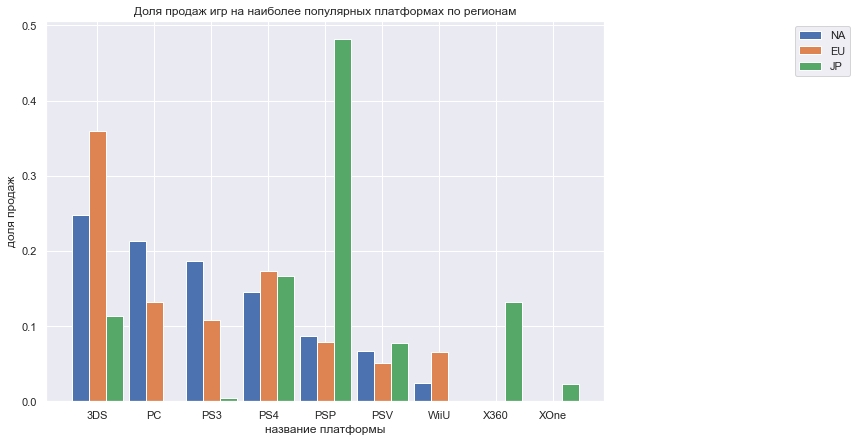

In [72]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set(title='Доля продаж игр на наиболее популярных платформах по регионам',
       xlabel='название платформы', ylabel='доля продаж')
x1 = np.arange(1,10) - 0.3
x2 = np.arange(1,10)
x3 = np.arange(1,10) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'WiiU', 'X360', 'XOne'])
ax.bar(x1, mostpopular_games['na_ratio'], width=0.3, label='NA')
ax.bar(x2, mostpopular_games['eu_ratio'], width=0.3, label='EU')
ax.bar(x3, mostpopular_games['jp_ratio'], width=0.3, label='JP')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

<div class="alert alert-info"> 
    
* В Северной Америке популярны 3DS, PC. 
* В Европе 3DS, PS4. 
* В Японии на пике PSP, PS4 

</div>

[Наверх к описанию проекта](#Описание)

### Самые популярные жанры <a class="anchor" id="топжанры"></a>

### Северная Америка (NA)

In [73]:
na_popular_genres = (games_actual
                                .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_popular_genres['na_ratio'] = round(na_popular_genres['na_sales'] / sum(na_popular_genres['na_sales']), 3)
na_mostpopular_genres = na_popular_genres.head()
na_mostpopular_genres

,genre,na_sales,na_ratio
0,Action,126.050,0.288
1,Shooter,109.740,0.251
2,Sports,65.270,0.149
3,Role-Playing,46.400,0.106
4,Misc,27.490,0.063


<div class="alert alert-info">   
В Северной Америке наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Шутер", "Спорт"
</div>

### Европа (EU)

In [74]:
eu_popular_genres = (games_actual
                                .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_popular_genres['eu_ratio'] = round(eu_popular_genres['eu_sales'] / sum(eu_popular_genres['eu_sales']), 3)
eu_mostpopular_genres = eu_popular_genres.head()
eu_mostpopular_genres

,genre,eu_sales,eu_ratio
0,Action,118.130,0.301
1,Shooter,87.860,0.224
2,Sports,60.520,0.154
3,Role-Playing,36.970,0.094
4,Racing,20.190,0.051


<div class="alert alert-info">
В Европе наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Экшн", "Шутер", "Спорт"
</div>

### Япония (JP)

In [75]:
jp_popular_genres = (games_actual
                                .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_popular_genres['jp_ratio'] = round(jp_popular_genres['jp_sales'] / sum(jp_popular_genres['jp_sales']), 3)
jp_mostpopular_genres = jp_popular_genres.head()
jp_mostpopular_genres

,genre,jp_sales,jp_ratio
0,Role-Playing,51.040,0.363
1,Action,40.490,0.288
2,Misc,9.200,0.065
3,Fighting,7.650,0.054
4,Shooter,6.610,0.047


<div class="alert alert-info">
В Японии наиболее продаваемыми играми за анализируемый период являются игры в жанрах "Ролевые", "Экшн"
</div>

### Сопоставление регионов по долям продаж популярных жанров

In [76]:
mostpopular_genres = na_mostpopular_genres.merge(eu_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres = mostpopular_genres.merge(jp_mostpopular_genres, on=['genre'], how='outer')
mostpopular_genres.drop(['na_sales', 'eu_sales', 'jp_sales'], axis='columns', inplace=True)
mostpopular_genres.sort_values(by='genre').reset_index(drop=True)

,genre,na_ratio,eu_ratio,jp_ratio
0,Action,0.288,0.301,0.288
1,Fighting,NaN,NaN,0.054
2,Misc,0.063,NaN,0.065
3,Racing,NaN,0.051,NaN
4,Role-Playing,0.106,0.094,0.363
5,Shooter,0.251,0.224,0.047
6,Sports,0.149,0.154,NaN


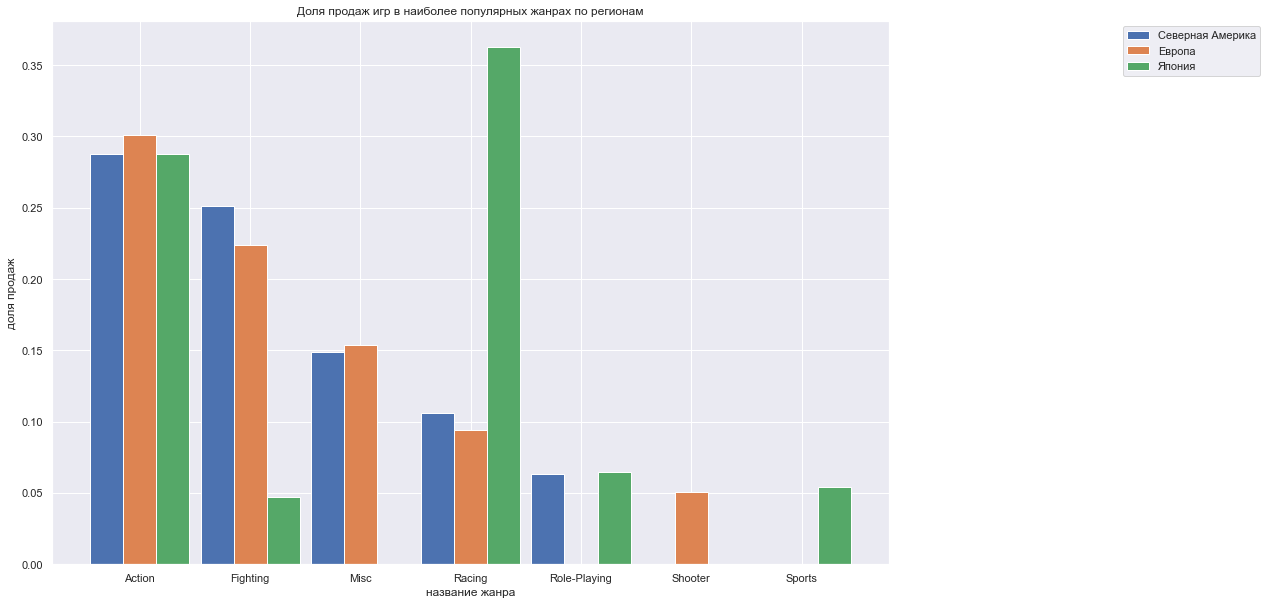

In [77]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set(title='Доля продаж игр в наиболее популярных жанрах по регионам',
       xlabel='название жанра', ylabel='доля продаж')
x1 = np.arange(1,8) - 0.3
x2 = np.arange(1,8)
x3 = np.arange(1,8) + 0.3
plt.xticks([1, 2, 3, 4, 5, 6, 7], ['Action', 'Fighting', 'Misc', 'Racing', 'Role-Playing', 'Shooter', 'Sports'])
ax.bar(x1, mostpopular_genres['na_ratio'], width=0.3, label='Северная Америка')
ax.bar(x2, mostpopular_genres['eu_ratio'], width=0.3, label='Европа')
ax.bar(x3, mostpopular_genres['jp_ratio'], width=0.3, label='Япония')
ax.grid=True
ax.legend(bbox_to_anchor=(1.45, 1), frameon=True, loc='upper right')
plt.show()

<div class="alert alert-info">
Игры в жанре "Экшн" довольно популярны во всех трёх регионах. Гонки самые популярные в Японии. </div>

[Наверх к описанию проекта](#Описание)

### Влияние рейтинга на продажи <a class="anchor" id="ESRB"></a>

### Северная Америка (NA)

In [78]:
na_rating_sales = (games_actual
                                .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                                .sort_values(by='na_sales', ascending=False)
                                .reset_index()
                   )
na_rating_sales['na_ratio'] = round(na_rating_sales['na_sales'] / sum(na_rating_sales['na_sales']), 3)
na_rating_sales

,rating,na_sales,na_ratio
0,M,165.210,0.377
1,unknown,89.420,0.204
2,E,79.050,0.181
3,E10+,54.240,0.124
4,T,49.790,0.114


<div class="alert alert-info">
    
В **Северной Америке** наиболее продаваемыми играми за анализируемый период являются игры c рейтингом **M ("для взрослых") - 37% от продаж**;
    
на втором месте игры , которые мы пометили, как **неопределенный рейтинг - 20%** 

на третьем месте игры с рейтингом **E ("для всех") - 18%**; 

на четвёртом месте игры с рейтингом **T ("подросткам") - 26%**;

на четвёртом месте игры с рейтингом **E10+ ("для всех от 10 лет и старше") - 11%**;</div>

### Европа (EU)

In [79]:
eu_rating_sales = (games_actual
                                .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                                .sort_values(by='eu_sales', ascending=False)
                                .reset_index()
                   )
eu_rating_sales['eu_ratio'] = round(eu_rating_sales['eu_sales'] / sum(eu_rating_sales['eu_sales']), 3)
eu_rating_sales

,rating,eu_sales,eu_ratio
0,M,145.320,0.370
1,E,83.360,0.213
2,unknown,78.910,0.201
3,E10+,42.690,0.109
4,T,41.950,0.107


<div class="alert alert-info">
    
В Европе наиболее продаваемыми играми за анализируемый период являются игры c рейтингом **M ("для взрослых") - 37%** от продаж;

на втором месте игры с рейтингом **Е ("для всех") - 21%**; 

на третьем месте игры, с **неопределенным рейтингом - 20%**;

на четвёртом месте игры с рейтингом **E10+ ("для всех от 10 лет и старше") - 11%**;

на пятом месте - игры с рейтингом **T ("подросткам") - 11%**.</div>

### Япония (JP)

In [80]:
jp_rating_sales = (games_actual
                                .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                                .sort_values(by='jp_sales', ascending=False)
                                .reset_index()
                   )
jp_rating_sales['jp_ratio'] = round(jp_rating_sales['jp_sales'] / sum(jp_rating_sales['jp_sales']), 3)
jp_rating_sales

,rating,jp_sales,jp_ratio
0,unknown,85.050,0.604
1,T,20.590,0.146
2,E,15.140,0.108
3,M,14.110,0.100
4,E10+,5.890,0.042


<div class="alert alert-info">
    
В Японии наиболее продаваемыми играми за анализируемый период являются игры **без определенного рейтинга  - 60%** от продаж;

на втором месте игры с рейтингом **T ("подросткам") - 15%**; 

на третьем месте игры с рейтингом **Е ("для всех") - 11%**; 

на четвёртом месте игры с рейтингом **М ("для взрослых") - 10%**; 

почти нет спроса на игры с рейтингом **E10+ ("для всех от 10 лет и старше") - 4%**.

</div>

[Наверх к описанию проекта](#Описание)

<div class="alert alert-info">
    
**Таким образом, в Северной Америке и Европе схожая структура продаж по рейтингу игр. В Японии предпочтения отличаются: подростковые игры более популярны, чем игры для взрослых. На игры для детей младшего возраста нет спроса ни в одном регионе.**    
    </div>

# 5. Проверка статистических гипотез <a class="anchor" id="Шаг5"></a>

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC <a class="anchor" id="meanratingplatforms"></a>

Будем анализировать две генеральные совокупности: рейтинг пользователей игр на платформе XBoxOne (xboxone) и PC (pc_games)

In [81]:
xboxone = games_actual[(games_actual['platform'] == 'XOne') & (games_actual['user_score'] > 0)]['user_score']
pc_games = games_actual[(games_actual['platform'] == 'PC') & (games_actual['user_score'] > 0)]['user_score']

**Сформулируем нулевую гипотезу H0**: Средние двух генеральных совокупностей равны между собой.

**Альтернативная гипотеза H1**: Средние двух генеральных совокупностей не равны между собой.

Несмотря на то, что 'xboxone' и 'pc_games' - это не совсем генеральные совокупности, а скорее, выборки, но согласно центральной предельной теореме, выборочные средние распределены нормально вокруг истинного среднего генеральной совокупности. Введём уровень значимости, определяющий близость к среднему значению: **5%.** <a class="anchor" id="alpha"></a>

Проверим гипотезы через распределение **t-Стьюдента**, так как сравниваемые выборки *независимы* между собой.<a class="anchor" id="explain"></a>

In [82]:
alpha = .05

results = st.ttest_ind(xboxone, pc_games)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу.


<div class="alert alert-info">
    
Мы принимаем нулевую гипотезу:*средние двух генеральных совокупностей равны между собой.*

* **Вывод: средние пользовательские рейтинги платформ Xbox One и PC равны между собой**
    
</div>

[Наверх к описанию проекта](#Описание)

### Гипотеза о различии средних пользовательских рейтингов жанров Action и Sports <a class="anchor" id="meanratinggenres"></a>

Сделаем похожие операции, но уже для интересующих нас жанров: 

In [83]:
action = games_actual[(games_actual['genre'] == 'Action') & (games_actual['user_score'] > 0)]['user_score']
sports = games_actual[(games_actual['genre'] == 'Sports') & (games_actual['user_score'] > 0)]['user_score']

**Сформулируем нулевую гипотезу H0:** Средние двух генеральных совокупностей равны между собой.

**Альтернативная гипотеза H1:** Средние двух генеральных совокупностей не равны между собой.

In [84]:
alpha = .05

results = st.ttest_ind(action, sports)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


<div class="alert alert-info">
    
* **Вывод: средние пользовательские рейтинги жанров Action и Sports не равны.**
    
</div>    

[Наверх к описанию проекта](#Описание)

# 6. Общий вывод: <a class="anchor" id="Шаг6"></a>

<div class="alert alert-info">
    
### *Чтобы спланировать рекламные кампании на 2017 год интернет-магазину "Стримчик" предлагаем следующие рекомендации:*

- Не ориентироваться при продаже игр на пользовательские оценки и не придавать большого значения оценкам критиков, но принимать их во внимание;

- Продавать игры на платформах XBoxOne и PlayStation4, которые набирают свою популярность и являются потенциально самыми прибыльными, делая акцент на играх в жанре 'Action' (самые прибыльные) и 'Shooter'(самые стабильные по продажам);

- В каждом из регионов рекомендуется продавать игры с рейтингом E ("для всех"). В Северной Америке и Европе также возможны высокие продажи игр с рейтингом M ("для взрослых"), а в Японии - с рейтингом T ("для подростков");

- Cрок устаревания платформы составляет 8-10 лет, поэтому не продавать игры на платформах, для которых этот срок приближается к 6-8 годам, так как основной доход можно получить от продаж игр на более молодых платформах, а не доживающих свой век.

### *Ситуация в игровой индустрии:*

- Рынок уже на протяжении почти уже 10 лет падает, вероятно из-за того, что затраты на разработку игр растут, требовательный пользователь хочет больше красивой графики и технологичности, в отличие от игр, которые были выпущены еще раньше и неизбалованные геймеры ценили игры за их атмосферность, а не внешний вид. Так что, на рынке остаются лишь крупные гиганты, способные отвечать требованиям "игрока". Необходимо привлекать крупные инвестиции, прежде, чем начинать разработку игры.
    
</div>

[Наверх к описанию проекта](#Описание)
